In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("/home/shivaprakash/Documents/git/Machine-Learning/Linear_Data.xlsx")

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


LINEAR REGRESSION

In [24]:
#code
x=data.V.values.reshape(-1,1)
y=data.PE
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))

0.7535728946213494


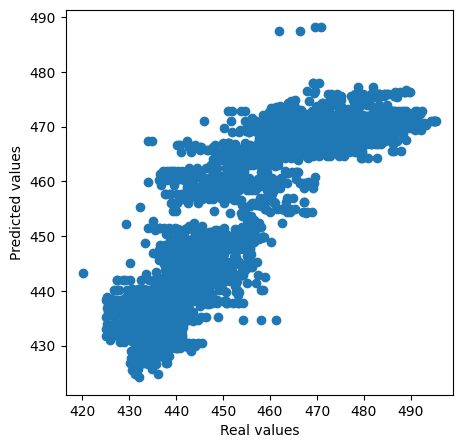

In [25]:
#visualization
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

In [26]:
#result tabulation
res=pd.DataFrame({"Real_values":y_test,"Pred_values":y_pred,"Pred_diff":y_test-y_pred})
res

,Real_values,Pred_values,Pred_diff
5014,458.96,465.689359,-6.729359
6947,463.29,468.431305,-5.141305
9230,435.27,435.714642,-0.444642
4290,484.31,473.215125,11.094875
6477,473.55,471.453279,2.096721
...,...,...,...
842,439.22,448.677628,-9.457628
2600,428.93,433.077707,-4.147707
7903,435.51,430.405768,5.104232
4280,458.64,457.031811,1.608189


- > Deploying model in pickle

1) PICKLE

In [12]:
#importing pickle
import pickle

In [13]:
#saving a model as pickle file
with open('model_pickle','wb') as f:
    pickle.dump(model , f)

In [14]:
#opening a file and predicting
with open('model_pickle','rb') as f:
    pick_model = pickle.load(f)

In [28]:
a = data['V']

In [29]:
pick_model.predict(a.values.reshape(-1,1))

array([469.03803327, 444.30218256, 471.79164684, ..., 431.03583244,
       436.72974524, 444.81556814])

2) JOBLIB

        Better performance than pickle while storing array files 

In [32]:
import joblib

In [33]:
joblib.dump(model , 'job_model.joblib')

['job_model.joblib']

In [34]:
job_model = joblib.load('job_model.joblib')

In [36]:
job_model.predict(a.values.reshape(-1,1))

array([469.03803327, 444.30218256, 471.79164684, ..., 431.03583244,
       436.72974524, 444.81556814])

3) SKOPS - Provides better security in model 